In [38]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import ast
import matplotlib.pyplot as plt
from joypy import joyplot

In [69]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler

## <font color='#eb3483'>EDA and Data Cleaning</font>

In [2]:
train = pd.read_csv("Train.csv")

In [3]:

for i,data in train.iterrows():
    td = []
    payments = []
    dates = data[1][1:-1].split(", ")
    paymentshistory = data[2][1:-1].split(", ")
    for date in dates:
        
        td.append(pd.to_datetime(date[1:-1]).date())
    train.TransactionDates[i] = np.array(td)
    for payment in paymentshistory:
        payments.append(float(payment))
    train.PaymentsHistory[i] = np.array(payments)
train.head()

C:\Users\alexi\AppData\Local\Temp/ipykernel_21228/2927625877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.TransactionDates[i] = np.array(td)
C:\Users\alexi\AppData\Local\Temp/ipykernel_21228/2927625877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.PaymentsHistory[i] = np.array(payments)


ID                                   TransactionDates  \
0  ID_MR53LEX  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
1  ID_3D7NQUH  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
2  ID_0IWQNPI  [2020-02-01, 2020-03-01, 2020-04-01, 2020-05-0...   
3  ID_IY8SYB9  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   
4  ID_9XHL7VZ  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   

                                     PaymentsHistory     m1      m2      m3  \
0  [3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...  880.0   930.0   495.0   
1  [2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...  660.0   935.0   935.0   
2      [2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]  700.0  1350.0  1550.0   
3  [2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...  580.0   480.0   800.0   
4  [2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...   40.0   440.0   460.0   

       m4      m5      m6  
0   715.0   220.0   385.0  
1   825.0   770.0   935.0  
2  1400.0  1450.0  1200.0  
3  1260.0  1650.0   530.0  
4   360.0    80.0   330.0

In [4]:
train.head()

ID                                   TransactionDates  \
0  ID_MR53LEX  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
1  ID_3D7NQUH  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
2  ID_0IWQNPI  [2020-02-01, 2020-03-01, 2020-04-01, 2020-05-0...   
3  ID_IY8SYB9  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   
4  ID_9XHL7VZ  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   

                                     PaymentsHistory     m1      m2      m3  \
0  [3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...  880.0   930.0   495.0   
1  [2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...  660.0   935.0   935.0   
2      [2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]  700.0  1350.0  1550.0   
3  [2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...  580.0   480.0   800.0   
4  [2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...   40.0   440.0   460.0   

       m4      m5      m6  
0   715.0   220.0   385.0  
1   825.0   770.0   935.0  
2  1400.0  1450.0  1200.0  
3  1260.0  1650.0   530.0  
4   360.0    80.0   330.0

In [5]:
date_list = []
for i,data in train.iterrows():
    dates = data[1]
    for date in dates:
        if not date in date_list:
            date_list.append(date)
date_list.sort()
date_list
         

[datetime.date(2015, 11, 1),
 datetime.date(2015, 12, 1),
 datetime.date(2016, 1, 1),
 datetime.date(2016, 2, 1),
 datetime.date(2016, 3, 1),
 datetime.date(2016, 4, 1),
 datetime.date(2016, 5, 1),
 datetime.date(2016, 6, 1),
 datetime.date(2016, 7, 1),
 datetime.date(2016, 8, 1),
 datetime.date(2016, 9, 1),
 datetime.date(2016, 10, 1),
 datetime.date(2016, 11, 1),
 datetime.date(2016, 12, 1),
 datetime.date(2017, 1, 1),
 datetime.date(2017, 2, 1),
 datetime.date(2017, 3, 1),
 datetime.date(2017, 4, 1),
 datetime.date(2017, 5, 1),
 datetime.date(2017, 6, 1),
 datetime.date(2017, 7, 1),
 datetime.date(2017, 8, 1),
 datetime.date(2017, 9, 1),
 datetime.date(2017, 10, 1),
 datetime.date(2017, 11, 1),
 datetime.date(2017, 12, 1),
 datetime.date(2018, 1, 1),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 3, 1),
 datetime.date(2018, 4, 1),
 datetime.date(2018, 5, 1),
 datetime.date(2018, 6, 1),
 datetime.date(2018, 7, 1),
 datetime.date(2018, 8, 1),
 datetime.date(2018, 9, 1),
 datetime.da

In [6]:
for col in date_list:
    train[col] = np.nan
train.head()

ID                                   TransactionDates  \
0  ID_MR53LEX  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
1  ID_3D7NQUH  [2018-04-01, 2018-05-01, 2018-06-01, 2018-07-0...   
2  ID_0IWQNPI  [2020-02-01, 2020-03-01, 2020-04-01, 2020-05-0...   
3  ID_IY8SYB9  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   
4  ID_9XHL7VZ  [2017-09-01, 2017-10-01, 2017-11-01, 2017-12-0...   

                                     PaymentsHistory     m1      m2      m3  \
0  [3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...  880.0   930.0   495.0   
1  [2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...  660.0   935.0   935.0   
2      [2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]  700.0  1350.0  1550.0   
3  [2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...  580.0   480.0   800.0   
4  [2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...   40.0   440.0   460.0   

       m4      m5      m6  2015-11-01  ...  2020-02-01  2020-03-01  \
0   715.0   220.0   385.0         NaN  ...         NaN         NaN   
1   825.0   770.0   935.0         NaN  ...         NaN         NaN   
2  1400.0  1450.0  1200.0         NaN  ...         NaN         NaN   
3  1260.0  1650.0   530.0         NaN  ...         NaN         NaN   
4   360.0    80.0   330.0         NaN  ...         NaN         NaN   

   2020-04-01  2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2020-10-01  2020-11-01  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 70 columns]

In [7]:
for i, data in train.iterrows():
    for j in range(len(data[2])):
        train[data[1][j]][i] = data[2][j]

C:\Users\alexi\AppData\Local\Temp/ipykernel_21228/3220214417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[data[1][j]][i] = data[2][j]


In [8]:
train.drop(columns=["TransactionDates", "PaymentsHistory"], inplace = True)
train.head()

ID     m1      m2      m3      m4      m5      m6  2015-11-01  \
0  ID_MR53LEX  880.0   930.0   495.0   715.0   220.0   385.0         NaN   
1  ID_3D7NQUH  660.0   935.0   935.0   825.0   770.0   935.0         NaN   
2  ID_0IWQNPI  700.0  1350.0  1550.0  1400.0  1450.0  1200.0         NaN   
3  ID_IY8SYB9  580.0   480.0   800.0  1260.0  1650.0   530.0         NaN   
4  ID_9XHL7VZ   40.0   440.0   460.0   360.0    80.0   330.0         NaN   

   2015-12-01  2016-01-01  ...  2020-02-01  2020-03-01  2020-04-01  \
0         NaN         NaN  ...       120.0       260.0       610.0   
1         NaN         NaN  ...       655.0       605.0       495.0   
2         NaN         NaN  ...      2850.0      1500.0      1350.0   
3         NaN         NaN  ...         NaN         NaN         NaN   
4         NaN         NaN  ...         NaN         NaN         NaN   

   2020-05-01  2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  \
0       230.0       390.0       660.0      1200.0      1320.0       280.0   
1       442.0       495.0       605.0       660.0       660.0       655.0   
2       610.0       200.0       250.0         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2020-11-01  
0       770.0  
1       770.0  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 68 columns]

In [23]:
test = pd.read_csv("Test.csv")

In [10]:
metadat = pd.read_csv("metadata.csv")

In [11]:
metadat.columns

Index(['ID', 'RegistrationDate', 'Deposit', 'UpsellDate', 'AccessoryRate',
       'PaymentMethod', 'rateTypeEntity', 'RatePerUnit', 'DaysOnDeposit',
       'MainApplicantGender', 'Age', 'Region', 'Town', 'Occupation',
       'SupplierName', 'Term', 'TotalContractValue', 'ExpectedTermDate',
       'FirstPaymentDate', 'LastPaymentDate'],
      dtype='object')

In [77]:
metadat.RegistrationDate = pd.to_datetime(metadata.RegistrationDate, format="%Y/%m/%d %H:%M:%S")
metadat.ExpectedTermDate = pd.to_datetime(metadata.ExpectedTermDate, format="%Y/%m/%d %H:%M:%S")
metadat.FirstPaymentDate = pd.to_datetime(metadata.FirstPaymentDate, format="%Y/%m/%d %H:%M:%S")
metadat.LastPaymentDate = pd.to_datetime(metadata.LastPaymentDate, format="%Y/%m/%d %H:%M:%S")


In [78]:
metadat.dtypes

ID                             object
RegistrationDate       datetime64[ns]
Deposit                         int64
UpsellDate             datetime64[ns]
AccessoryRate                 float64
PaymentMethod                  object
rateTypeEntity                 object
RatePerUnit                     int64
DaysOnDeposit                   int64
MainApplicantGender            object
Age                           float64
Region                         object
Town                           object
Occupation                     object
SupplierName                   object
Term                            int64
TotalContractValue            float64
ExpectedTermDate       datetime64[ns]
FirstPaymentDate       datetime64[ns]
LastPaymentDate        datetime64[ns]
dtype: object

In [15]:
metadat.isnull().sum()

ID                         0
RegistrationDate           0
Deposit                    0
UpsellDate             36370
AccessoryRate              0
PaymentMethod              0
rateTypeEntity             0
RatePerUnit                0
DaysOnDeposit              0
MainApplicantGender        0
Age                     6939
Region                  1934
Town                       0
Occupation                 0
SupplierName               0
Term                       0
TotalContractValue         0
ExpectedTermDate           0
FirstPaymentDate           0
LastPaymentDate            0
dtype: int64

In [16]:
metadat.isnull().sum()/metadata.shape[0]*100

ID                      0.000000
RegistrationDate        0.000000
Deposit                 0.000000
UpsellDate             97.394425
AccessoryRate           0.000000
PaymentMethod           0.000000
rateTypeEntity          0.000000
RatePerUnit             0.000000
DaysOnDeposit           0.000000
MainApplicantGender     0.000000
Age                    18.581796
Region                  5.179016
Town                    0.000000
Occupation              0.000000
SupplierName            0.000000
Term                    0.000000
TotalContractValue      0.000000
ExpectedTermDate        0.000000
FirstPaymentDate        0.000000
LastPaymentDate         0.000000
dtype: float64

<AxesSubplot:>

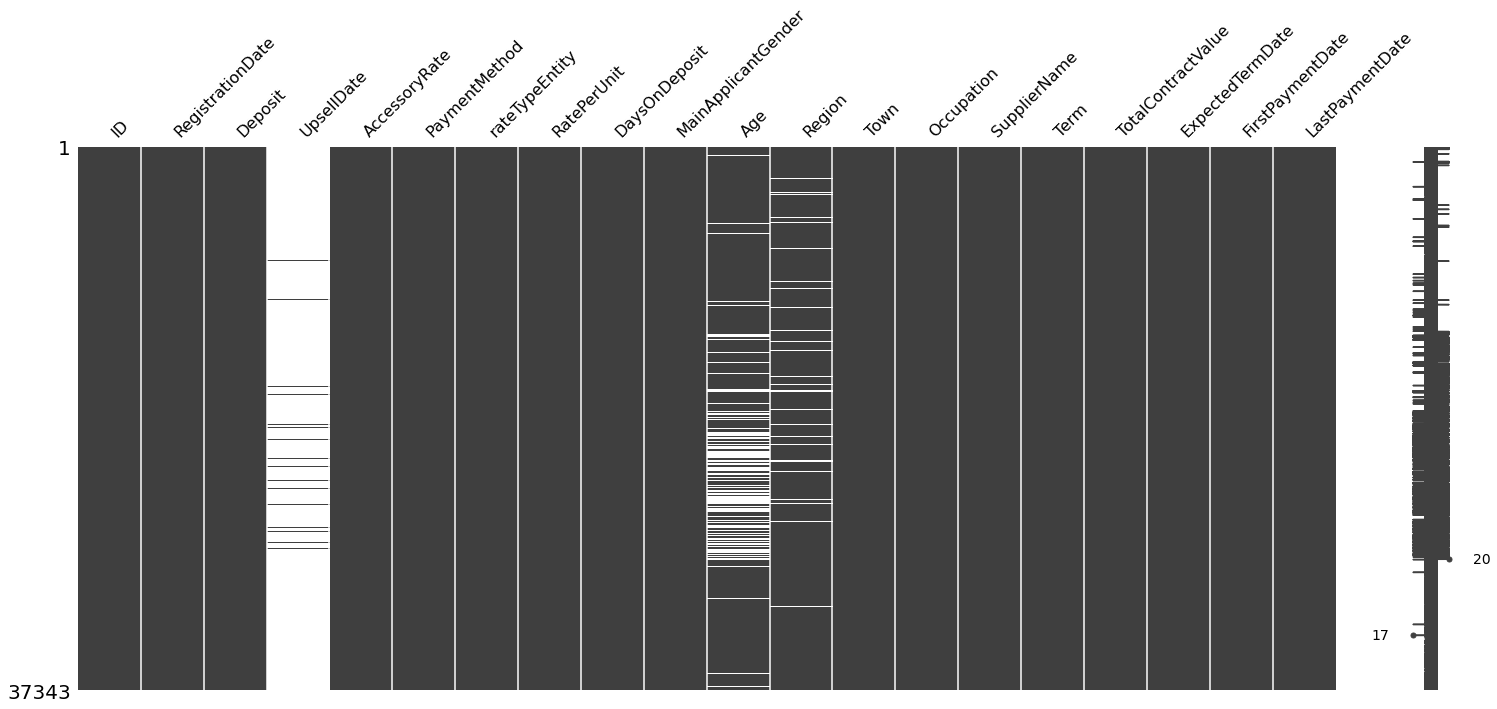

In [17]:
msno.matrix(metadata)

In [18]:
# Dropping UpsellDate because of too many missing values
metadata.drop(columns = "UpsellDate", inplace = True)

In [19]:
metadat.Region.unique()

array(['Mount Kenya Region', 'Coast Region', 'Nairobi Region', nan,
       'South Rift', 'Western', 'North Rift', 'Nyanza'], dtype=object)

In [20]:
metadat.describe()

Deposit  AccessoryRate   RatePerUnit  DaysOnDeposit           Age  \
count  37343.000000   37343.000000  37343.000000   37343.000000  30404.000000   
mean    2348.631685       1.136090     49.923868       4.600835     38.855677   
std      417.814614       7.791789     57.500215       3.429060     12.300827   
min        0.000000       0.000000     35.000000       0.000000     19.000000   
25%     2000.000000       0.000000     40.000000       3.000000     29.000000   
50%     2000.000000       0.000000     40.000000       3.000000     36.000000   
75%     2500.000000       0.000000     55.000000       7.000000     46.000000   
max     8000.000000     240.000000   4000.000000      60.000000    120.000000   

               Term  TotalContractValue  
count  37343.000000        37343.000000  
mean     412.427657        22953.005142  
std      121.602544        10149.863172  
min       10.000000        10800.000000  
25%      364.000000        16560.000000  
50%      364.000000        16560.000000  
75%      547.000000        33080.000000  
max      626.000000        64484.000000

<AxesSubplot:xlabel='Age'>

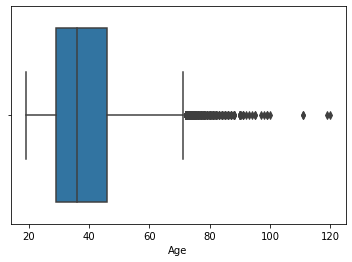

In [21]:
#removing outliers
sns.boxplot(x=metadata.Age)

In [22]:
metadata.loc[metadata.Age>100]

ID     RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
6134   ID_OCAFVZ1  2017-08-16 14:54:02     2000            0.0      FINANCED   
25499  ID_96DYWMV  2018-04-16 09:33:10     2500            0.0      FINANCED   
27110  ID_YESNWWD  2018-04-24 16:36:33     2500            0.0      FINANCED   
29785  ID_1HID3PG  2020-01-10 12:52:53     2000            0.0      FINANCED   

      rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender    Age  \
6134           DAILY           40              7              Female  111.0   
25499          DAILY           55              3                Male  120.0   
27110          DAILY           55              3              Female  119.0   
29785          DAILY           40              3                Male  111.0   

             Region          Town Occupation SupplierName  Term  \
6134     North Rift       Baringo   Business      d_light   364   
25499  Coast Region  Taita/Taveta     Farmer      d_light   556   
27110        Nyanza        Kisumu   Business      d_light   556   
29785  Coast Region        Kilifi   Business      d_light   270   

       TotalContractValue     ExpectedTermDate     FirstPaymentDate  \
6134              16560.0  2018-08-15 14:54:02  2017-08-16 14:53:55   
25499             33080.0  2019-10-24 09:33:10  2018-04-16 09:33:10   
27110             33080.0  2019-11-01 16:36:33  2018-04-24 16:36:32   
29785             12800.0  2020-10-06 12:52:53  2020-01-10 12:53:02   

           LastPaymentDate  
6134   2019-03-21 17:08:18  
25499  2021-01-02 11:28:04  
27110  2021-05-24 16:15:07  
29785  2021-02-05 16:11:21

In [26]:
merged = pd.merge(left=metadata, right=pd.concat(objs=[train, test]).fillna(value=0.), on="ID")
merged

ID     RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
0      ID_K00S4N4  2015-12-10 00:00:00     2000            0.0      FINANCED   
1      ID_6L67PAA  2015-12-09 00:00:00     2000            0.0      FINANCED   
2      ID_102CV85  2015-12-18 00:00:00     2000           35.0      FINANCED   
3      ID_HXBJFHB  2015-11-25 00:00:00     2000            0.0      FINANCED   
4      ID_3K9VZ5J  2015-12-02 00:00:00     2000            0.0      FINANCED   
...           ...                  ...      ...            ...           ...   
37338  ID_OKJ96OW  2020-02-20 18:26:52     2400            0.0      FINANCED   
37339  ID_5J9OMUP  2020-02-20 18:30:59     2400            0.0      FINANCED   
37340  ID_J4I8Z2V  2020-02-20 18:42:26     3000            0.0      FINANCED   
37341  ID_GHHAQ9D  2020-02-20 18:46:30     2400            0.0      FINANCED   
37342  ID_PAI1FJK  2020-02-20 19:30:43     2400            0.0      FINANCED   

      rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender   Age  \
0              DAILY           35              7                Male  41.0   
1              DAILY           35              7                Male  33.0   
2              DAILY           35              7              Female  48.0   
3              DAILY           35              7              Female  43.0   
4              DAILY           35              7              Female  56.0   
...              ...          ...            ...                 ...   ...   
37338          DAILY           50              3              Female  38.0   
37339          DAILY           50              3                Male  23.0   
37340          DAILY           40              3                Male  31.0   
37341          DAILY           50              3                Male  27.0   
37342          DAILY           50              3                Male  36.0   

       ... 2020-04-01 2020-05-01 2020-06-01 2020-07-01  2020-08-01  \
0      ...        0.0        0.0        0.0        0.0         0.0   
1      ...        0.0        0.0        0.0        0.0         0.0   
2      ...        0.0        0.0        0.0        0.0         0.0   
3      ...        0.0        0.0        0.0        0.0         0.0   
4      ...        0.0        0.0        0.0        0.0         0.0   
...    ...        ...        ...        ...        ...         ...   
37338  ...     1230.0     1100.0     1400.0        0.0         0.0   
37339  ...      950.0     1150.0     1150.0      750.0      1150.0   
37340  ...      920.0      920.0      920.0     1240.0      1080.0   
37341  ...     1200.0     1050.0     1100.0      650.0       150.0   
37342  ...        0.0       50.0     1350.0      450.0      1050.0   

       2020-09-01 2020-10-01 2020-11-01  \
0             0.0        0.0        0.0   
1             0.0        0.0        0.0   
2             0.0        0.0        0.0   
3             0.0        0.0        0.0   
4             0.0        0.0        0.0   
...           ...        ...        ...   
37338         0.0        0.0        0.0   
37339      1250.0        0.0        0.0   
37340      1000.0      960.0        0.0   
37341        55.0      315.0        0.0   
37342       700.0     1150.0      760.0   

                                        TransactionDates  \
0                                                    0.0   
1      ['12-2015', '01-2016', '02-2016', '03-2016', '...   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
...                                                  ...   
37338                                                0.0   
37339                                                0.0   
37340                                                0.0   
37341                                                0.0   
37342                                                0.0   

                                      

In [28]:
merged.drop(columns=["TransactionDates", "PaymentsHistory"], inplace = True)
merged.tail()

ID     RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
37338  ID_OKJ96OW  2020-02-20 18:26:52     2400            0.0      FINANCED   
37339  ID_5J9OMUP  2020-02-20 18:30:59     2400            0.0      FINANCED   
37340  ID_J4I8Z2V  2020-02-20 18:42:26     3000            0.0      FINANCED   
37341  ID_GHHAQ9D  2020-02-20 18:46:30     2400            0.0      FINANCED   
37342  ID_PAI1FJK  2020-02-20 19:30:43     2400            0.0      FINANCED   

      rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender   Age  \
37338          DAILY           50              3              Female  38.0   
37339          DAILY           50              3                Male  23.0   
37340          DAILY           40              3                Male  31.0   
37341          DAILY           50              3                Male  27.0   
37342          DAILY           50              3                Male  36.0   

       ... 2020-02-01 2020-03-01 2020-04-01 2020-05-01  2020-06-01  \
37338  ...     2680.0     1240.0     1230.0     1100.0      1400.0   
37339  ...     2700.0      400.0      950.0     1150.0      1150.0   
37340  ...     3680.0      600.0      920.0      920.0       920.0   
37341  ...     2620.0     1300.0     1200.0     1050.0      1100.0   
37342  ...     2450.0       50.0        0.0       50.0      1350.0   

       2020-07-01 2020-08-01 2020-09-01 2020-10-01  2020-11-01  
37338         0.0        0.0        0.0        0.0         0.0  
37339       750.0     1150.0     1250.0        0.0         0.0  
37340      1240.0     1080.0     1000.0      960.0         0.0  
37341       650.0      150.0       55.0      315.0         0.0  
37342       450.0     1050.0      700.0     1150.0       760.0  

[5 rows x 86 columns]

In [29]:
merged.columns

Index([                 'ID',    'RegistrationDate',             'Deposit',
             'AccessoryRate',       'PaymentMethod',      'rateTypeEntity',
               'RatePerUnit',       'DaysOnDeposit', 'MainApplicantGender',
                       'Age',              'Region',                'Town',
                'Occupation',        'SupplierName',                'Term',
        'TotalContractValue',    'ExpectedTermDate',    'FirstPaymentDate',
           'LastPaymentDate',                  'm1',                  'm2',
                        'm3',                  'm4',                  'm5',
                        'm6',            2015-11-01,            2015-12-01,
                  2016-01-01,            2016-02-01,            2016-03-01,
                  2016-04-01,            2016-05-01,            2016-06-01,
                  2016-07-01,            2016-08-01,            2016-09-01,
                  2016-10-01,            2016-11-01,            2016-12-01,
            

In [31]:
merged2 = merged.iloc[:, 25:86]
merged2.head()

2015-11-01  2015-12-01  2016-01-01  2016-02-01  2016-03-01  2016-04-01  \
0         0.0      3050.0      1050.0       910.0      1050.0      1050.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0      4245.0       980.0       735.0       735.0      1470.0   
3      2245.0       980.0       980.0      1225.0       980.0       980.0   
4         0.0      2750.0      1000.0       750.0      1000.0       955.0   

   2016-05-01  2016-06-01  2016-07-01  2016-08-01  ...  2020-02-01  \
0         0.0         0.0         0.0         0.0  ...         0.0   
1         0.0         0.0         0.0         0.0  ...         0.0   
2       735.0       980.0       915.0       735.0  ...         0.0   
3       980.0      1225.0       735.0       490.0  ...         0.0   
4       880.0       280.0       665.0       770.0  ...         0.0   

   2020-03-01  2020-04-01  2020-05-01  2020-06-01  2020-07-01  2020-08-01  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-09-01  2020-10-01  2020-11-01  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2         0.0         0.0         0.0  
3         0.0         0.0         0.0  
4         0.0         0.0         0.0  

[5 rows x 61 columns]

In [32]:
# create a mean payment of all the payments over the contract
merged['AveragePayment'] = merged.iloc[:,25:86].mean(axis=1)
merged.head()

ID     RegistrationDate  Deposit  AccessoryRate PaymentMethod  \
0  ID_K00S4N4  2015-12-10 00:00:00     2000            0.0      FINANCED   
1  ID_6L67PAA  2015-12-09 00:00:00     2000            0.0      FINANCED   
2  ID_102CV85  2015-12-18 00:00:00     2000           35.0      FINANCED   
3  ID_HXBJFHB  2015-11-25 00:00:00     2000            0.0      FINANCED   
4  ID_3K9VZ5J  2015-12-02 00:00:00     2000            0.0      FINANCED   

  rateTypeEntity  RatePerUnit  DaysOnDeposit MainApplicantGender   Age  ...  \
0          DAILY           35              7                Male  41.0  ...   
1          DAILY           35              7                Male  33.0  ...   
2          DAILY           35              7              Female  48.0  ...   
3          DAILY           35              7              Female  43.0  ...   
4          DAILY           35              7              Female  56.0  ...   

  2020-03-01 2020-04-01 2020-05-01 2020-06-01  2020-07-01  2020-08-01  \
0        0.0        0.0        0.0        0.0         0.0         0.0   
1        0.0        0.0        0.0        0.0         0.0         0.0   
2        0.0        0.0        0.0        0.0         0.0         0.0   
3        0.0        0.0        0.0        0.0         0.0         0.0   
4        0.0        0.0        0.0        0.0         0.0         0.0   

  2020-09-01 2020-10-01 2020-11-01  AveragePayment  
0        0.0        0.0        0.0      116.557377  
1        0.0        0.0        0.0        0.000000  
2        0.0        0.0        0.0      189.016393  
3        0.0        0.0        0.0      181.475410  
4        0.0        0.0        0.0      175.901639  

[5 rows x 87 columns]

## <font color='#eb3483'>Drop other irrelevant columns</font>

In [71]:
def drop_cols(df):
    df.drop(
        [
            "PaymentMethod",
            "SupplierName",
            "Town",
            "RegistrationDate"
        ],
        inplace=True,
        axis=1
    )
drop_cols(merged)


## <font color='#eb3483'>Visualizations</font>

In [33]:
# let's see the correlation coefficients between numerical variables 
correlations = merged.select_dtypes(include=[float]).corr()
correlations

AccessoryRate       Age  TotalContractValue        m1  \
AccessoryRate            1.000000  0.059873            0.474111  0.188158   
Age                      0.059873  1.000000            0.069155  0.063117   
TotalContractValue       0.474111  0.069155            1.000000  0.212662   
m1                       0.188158  0.063117            0.212662  1.000000   
m2                       0.154764  0.079894            0.180566  0.580481   
...                           ...       ...                 ...       ...   
2020-08-01               0.007776 -0.110639           -0.022812  0.020390   
2020-09-01               0.025404 -0.067002            0.033900  0.023836   
2020-10-01               0.029579 -0.060464            0.064427  0.028948   
2020-11-01               0.016996 -0.057332            0.084309  0.046466   
AveragePayment           0.290215  0.073460            0.552573  0.571128   

                          m2        m3        m4        m5        m6  \
AccessoryRate       0.154764  0.172114  0.169382  0.203168  0.074200   
Age                 0.079894  0.082820  0.079204  0.071867  0.060075   
TotalContractValue  0.180566  0.213643  0.208557  0.203139  0.120488   
m1                  0.580481  0.658766  0.626634  0.596603  0.278523   
m2                  1.000000  0.579332  0.549529  0.512939  0.245634   
...                      ...       ...       ...       ...       ...   
2020-08-01         -0.003554 -0.018032  0.000790 -0.005571 -0.006524   
2020-09-01         -0.006368 -0.019813 -0.006252 -0.009876 -0.004519   
2020-10-01         -0.002018 -0.022570 -0.002676 -0.005588 -0.005331   
2020-11-01          0.003694 -0.016172  0.007705 -0.006074 -0.001947   
AveragePayment      0.482160  0.564353  0.555778  0.529851  0.266948   

                    2015-11-01  ...  2020-03-01  2020-04-01  2020-05-01  \
AccessoryRate        -0.002240  ...   -0.005384   -0.002852    0.004949   
Age                   0.003252  ...   -0.186312   -0.179319   -0.157895   
TotalContractValue   -0.012429  ...   -0.187809   -0.172453   -0.156468   
m1                    0.002423  ...    0.124119    0.122852    0.116412   
m2                    0.006644  ...    0.081556    0.078063    0.072203   
...                        ...  ...         ...         ...         ...   
2020-08-01           -0.005890  ...    0.425257    0.418204    0.404201   
2020-09-01           -0.004643  ...    0.290913    0.294064    0.277809   
2020-10-01           -0.004116  ...    0.230045    0.225699    0.216337   
2020-11-01           -0.004056  ...    0.208607    0.212175    0.201370   
AveragePayment       -0.002164  ...    0.107699    0.107438    0.098125   

                    2020-06-01  2020-07-01  2020-08-01  2020-09-01  \
AccessoryRate        -0.005192    0.015254    0.007776    0.025404   
Age                  -0.146801   -0.122995   -0.110639   -0.067002   
TotalContractValue   -0.133605   -0.054607   -0.022812    0.033900   
m1                    0.092288    0.046538    0.020390    0.023836   
m2                    0.047735    0.016062   -0.003554   -0.006368   
...                        ...         ...         ...         ...   
2020-08-01            0.502932    0.655262    1.000000    0.623993   
2020-09-01            0.339662    0.449347    0.623993    1.000000   
2020-10-01            0.265546    0.347820    0.469194    0.526833   
2020-11-01            0.245527    0.329078    0.428948    0.471627   
AveragePayment        0.105665    0.148286    0.155088    0.156131   

                    2020-10-01  2020-11-01  AveragePayment  
AccessoryRate         0.029579    0.016996        0.290215  
Age                  -0.060464   -0.057332        0.073460  
TotalContractValue    0.064427    0.084309        0.552573  
m1                    0.028948    0.046466        0.571128  
m2                   -0.002018    0.003694        0.482160  
...                        ...         ...             ...  
2020-08-01            0.469194    0.428948        0.155088  


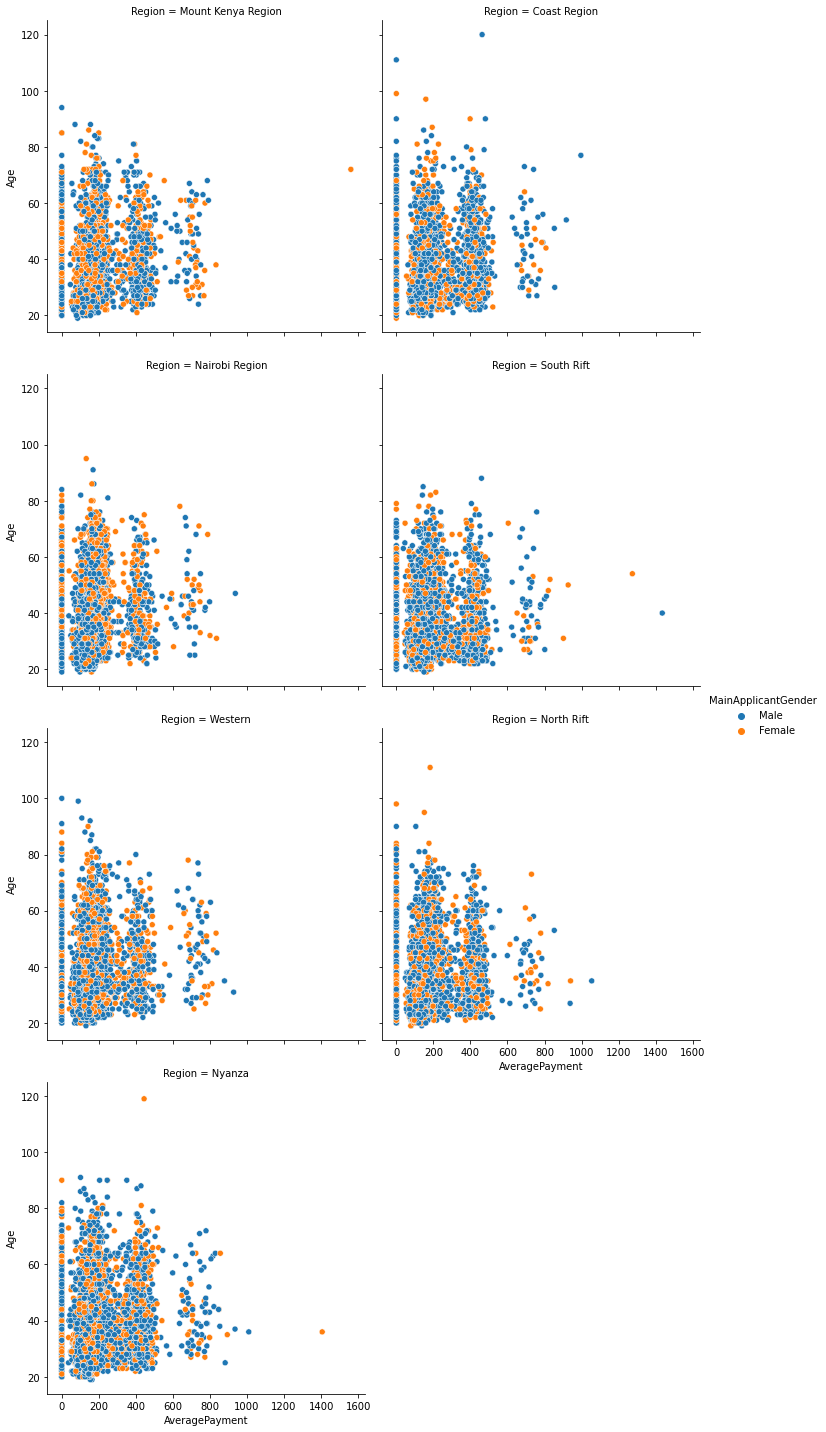

In [36]:
#let's see the relationship between average payment and age
sns.relplot(data=merged, x="AveragePayment", y="Age", hue="MainApplicantGender", col="Region", col_wrap=2)

## <font color='#eb3483'>Summary</font>

Most users are male. However, there does not seem to be much variation between the two genders' average total payments over their contract terms in each Region. Something that is of note though is that the average payment value between both genders for every Region is between the 200-600 region. This can be used to predict a model of future payments based on the contract value and how much is left on the contract since the last payment.

In [37]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


<Figure size 432x288 with 0 Axes>

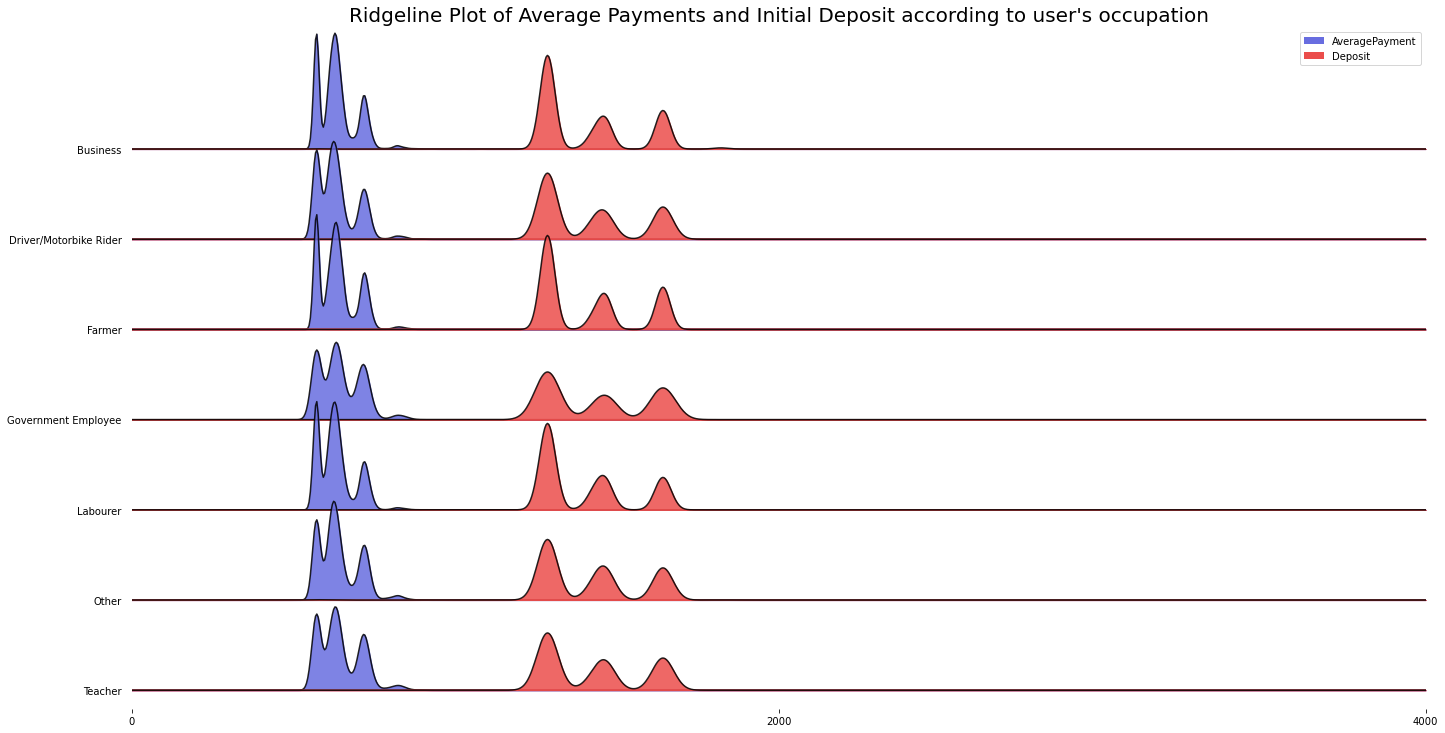

In [67]:
plt.figure()

joyplot(
    data=merged[['AveragePayment', 'Deposit', 'Occupation']], 
    by='Occupation',
    column=['AveragePayment', 'Deposit'],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(20, 10)

)
plt.xlim(0, 4000)
plt.title("Ridgeline Plot of Average Payments and Initial Deposit according to user's occupation", fontsize=20)
plt.show()

## <font color='#eb3483'>Summary</font>

The purpose of the ridgeline plot is to see the distribution of average payments amongst every user's occupation compared with their initial deposit. The peaks for each occupation follow a similar trend/pattern. But something useful to note is how a high proportion of those in Business, Farmers and Labourers' average payment are lower/towards zero. This can be useful with the loan status predictor (likelihood of being a good/bad payer)  

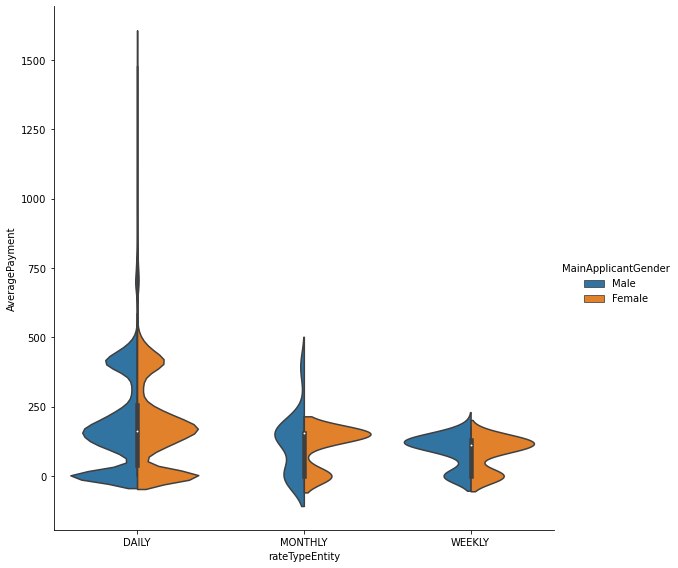

In [54]:
sns.catplot(x="rateTypeEntity", y="AveragePayment", hue="MainApplicantGender",
            kind="violin", split=True, height=8, data=merged)

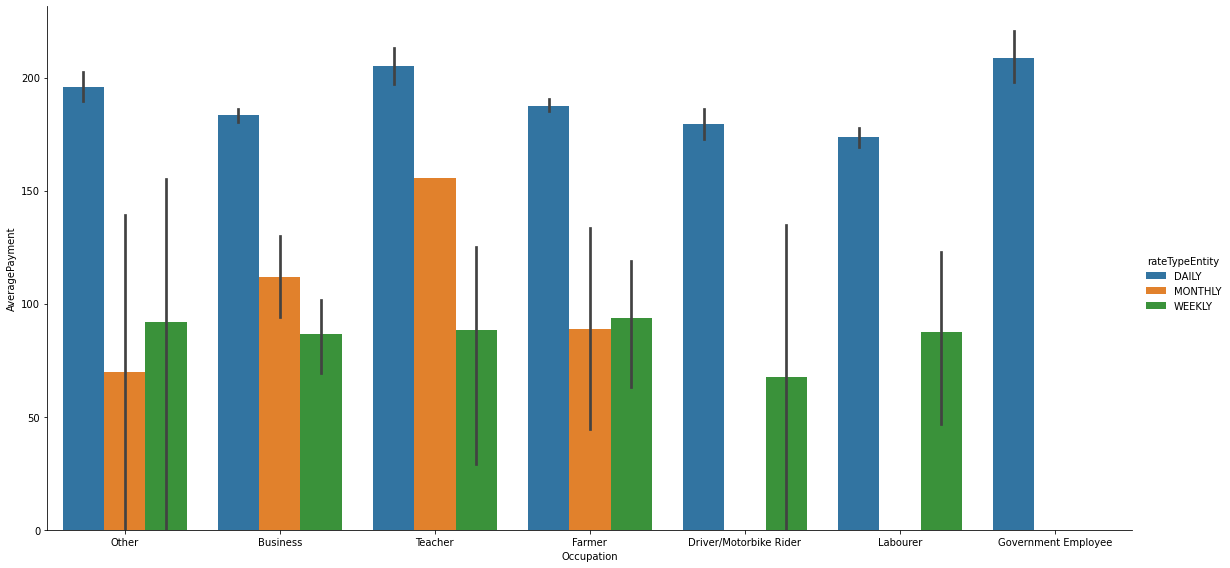

In [63]:
sns.catplot(x="Occupation", y="AveragePayment", hue="rateTypeEntity", kind="bar", data=merged, height=8, aspect=2)

## <font color='#eb3483'>Summary</font>

Higher proportion of users are likely to pay Daily between the two genders. In relation to occupation, the same can be said that most users pay Daily. However, something of note is how there are no Monthly payers for the Driver, Labourer and Government Employee users. It's hard to see yet, but it is possible that payments which are more frequent (i.e daily or weekly) would be more reliable in terms of predicting future payment and building loan status predictor model. But there is more to analyze.

## <font color='#eb3483'>Model Analaysis</font>

To build a loan status predictor we need to have criteria to detrmine whether a user is a good/bad payer. For this we can use classification as we are predicting a categorical outcome (which in this case is binary - good/bad)

In [79]:
# let's see the gap between payments by creating new columns

# gap between first and last payment
#merged["LastFirstDuration"] = (merged.LastPaymentDate - merged.FirstPaymentDate).astype("timedelta64[M]")

# gap bewteen contract term date and first payment
#merged["ExpectedFirstDuration"] = (merged.ExpectedTermDate - merged.FirstPaymentDate).astype("timedelta64[M]")

# gap between registration date and last payment
#merged["LastRegistrationDuration"] = (merged.LastPaymentDate - merged.RegistrationDate).astype("timedelta64[M]")

## <font color='#eb3483'>Classification</font>

In [92]:
merged.head()

ID  Deposit  AccessoryRate rateTypeEntity  RatePerUnit  \
0  ID_K00S4N4     2000            0.0          DAILY           35   
1  ID_6L67PAA     2000            0.0          DAILY           35   
2  ID_102CV85     2000           35.0          DAILY           35   
3  ID_HXBJFHB     2000            0.0          DAILY           35   
4  ID_3K9VZ5J     2000            0.0          DAILY           35   

   DaysOnDeposit MainApplicantGender   Age              Region Occupation  \
0              7                Male  41.0  Mount Kenya Region      Other   
1              7                Male  33.0        Coast Region      Other   
2              7              Female  48.0      Nairobi Region   Business   
3              7              Female  43.0                 NaN    Teacher   
4              7              Female  56.0  Mount Kenya Region      Other   

   ...  2020-04-01  2020-05-01 2020-06-01 2020-07-01 2020-08-01  2020-09-01  \
0  ...         0.0         0.0        0.0        0.0        0.0         0.0   
1  ...         0.0         0.0        0.0        0.0        0.0         0.0   
2  ...         0.0         0.0        0.0        0.0        0.0         0.0   
3  ...         0.0         0.0        0.0        0.0        0.0         0.0   
4  ...         0.0         0.0        0.0        0.0        0.0         0.0   

   2020-10-01  2020-11-01  AveragePayment  Good Payer  
0         0.0         0.0      116.557377       False  
1         0.0         0.0        0.000000       False  
2         0.0         0.0      189.016393       False  
3         0.0         0.0      181.475410       False  
4         0.0         0.0      175.901639       False  

[5 rows x 84 columns]

In [ ]:
sns.pairplot(merged.loc[:, ["Deposit", "Term", "DaysOnDeposit", "Age", "AveragePayment"]])

In [87]:
merged.AveragePayment.describe()

count    37343.000000
mean       185.365181
std        161.981034
min          0.000000
25%         18.196721
50%        161.639344
75%        254.426230
max       1560.475410
Name: AveragePayment, dtype: float64

In [91]:
# attempt to simplify this dataset and turn it into a binary classification problem according to the average payment for each ID.
merged["Good Payer"] = merged.AveragePayment >= 150